# A model of investor sentiment

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

# Model description

**Model setup**

The purpose of this model is to understand how a representative rational investor operates on the stock market, given a wrong idea of the true model of the assets.

_**True model of dividend earnings**_

Earnings at time $t$: $N_t = N_{t-1}+y_t\\$ 
Where $y_t$ is a random shock to earnings that can take two values, $y$ and $-y$ with equal probability


_**The mode investor believes**_

Investor believes the shocks in two consecutive periods to be correlated.\
The correlation can be negative (Mean reversion) or positive (momentum)\
The two models can be described by:

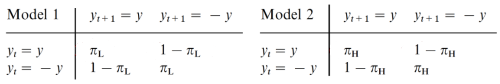

Assume $\pi_L < \frac{1}{2} < \pi_H$

Such that if investor believes in model 1, a positive shock in $y_{t+1}$ is less likely after a positive shock in $y$\
If investor believes in model 2, a positive shock in $y_{t+1}$ is more likely after a positive shock in $y$

If investor believes in model 1, he reacts too little to individual earnings announcements that creates a positive shock, as he expects a negative shock in the following period.\
Conversely, if he believes in model 2, he reacts too strongly in strings of positive shocks, as he expects the positive shocks to continue.

_Model switching_

Investor believes in two states of the world:\
$s_t = 1$: Earnings shock in $y_t$ is generated by model 1\
$s_t = 2$: Earnings shock in $y_t$ is generated by model 2\

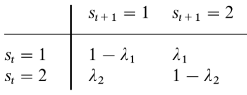

Assume $\lambda_1+\lambda_2 < 1$ (regime switch is rare)

_**Investor's earnings forecast**_

Investor observes earnings in each period and tries to understand which model is currently governing earnings.\
In the following, investor observes $y_{t+1}$ and calculates the probability $q_{t+1}$ = probability that model 1 generated the earnings.\
$q_{t+1}=P(s_{t+1}=1 | y_{t+1},y_t,q_t)$

$q_{t+1}=\frac{P(y_{t+1}|y_t,s_{t+1}=1)*P(s_{t+1}=1)}{P(y_{t+1}|y_t,s_{t+1}=1)*P(s_{t+1}=1)+P(y_{t+1}|y_t,s_{t+1}=2)*P(s_{t+1}=2)}$

Where:\
$P(s_{t+1}=1)=(1-\lambda_1)q_t + \lambda_2(1-q_t)$\
$P(s_{t+1}=2)=\lambda_1q_t + (1-\lambda_2)(1-q_t)$


_Shocks with same sign in t and t+1_\
$P(y_{t+1}=y|y_t=y,s_{t+1}=1)=P(y_{t+1}=-y|y_t=-y,s_{t+1}=1)=\pi_L$\
$P(y_{t+1}=y|y_t=y,s_{t+1}=2)=P(y_{t+1}=-y|y_t=-y,s_{t+1}=2)=\pi_H$

$q_{t+1}=\frac{\pi_L[(1-\lambda_1)q_t+\lambda_2(1-q_t)]}{\pi_L[(1-\lambda_1)q_t+\lambda_2(1-q_t)]+\pi_H[\lambda_1q_t+(1-\lambda_2)(1-q_t)]}$
\
\
\
\
_Shocks with opposite sign in t and t+1_\
$P(y_{t+1}=y|y_t=-y,s_{t+1}=1)=P(y_{t+1}=-y|y_t=y,s_{t+1}=1)=1-\pi_L$\
$P(y_{t+1}=y|y_t=-y,s_{t+1}=2)=P(y_{t+1}=-y|y_t=y,s_{t+1}=2)=1-\pi_H$

$q_{t+1}=\frac{(1-\pi_L)[(1-\lambda_1)q_t+\lambda_2(1-q_t)]}{(1-\pi_L)[(1-\lambda_1)q_t+\lambda_2(1-q_t)]+(1-\pi_H)[\lambda_1q_t+(1-\lambda_2)(1-q_t)]}$

## Numerical solution

In [2]:
from modelproject import InvestorForecast
model = InvestorForecast()
par = model.par

Initial parameters are defined in the .py file

**Investor's forecast**

_Proof of concept_

In [3]:
print(f'Probability that model 1 governs earnings in period t+1 when two identical shocks hit: {model.forecast(1,1,par.q_ini):.2f}')
print(f'Probability that model 1 governs earnings in period t+1 when two oppostite shocks hit: {model.forecast(1,-1,par.q_ini):.2f}')

Probability that model 1 governs earnings in period t+1 when two identical shocks hit: 0.40
Probability that model 1 governs earnings in period t+1 when two oppostite shocks hit: 0.60


The investor's perceived probability that model 1 governs earnings increases as shocks changes signs

**Convergence given consecutive shocks with same sign**

In the following, $q_{t+1}$ will be saved as _q_ for the consecutive period.

Iteration	q		new_q
1		0.500000	0.400000
2		0.400000	0.380952
3		0.380952	0.377358
4		0.377358	0.376682
5		0.376682	0.376554
6		0.376554	0.376530
7		0.376530	0.376526
8		0.376526	0.376525


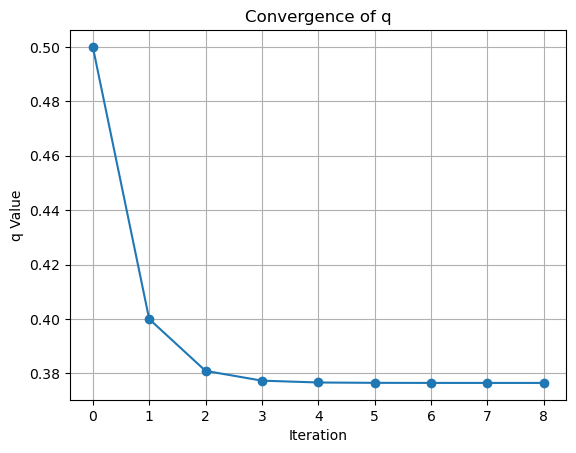

In [37]:
model.convergence(1,1);

Given the initial parameters and consecutive positive shocks to $y_t$, investor will believe model 1 governs earnings at probability 0.38

**Convergence given consecutive alternating shocks**

Iteration	q		new_q
1		0.500000	0.600000
2		0.600000	0.619048
3		0.619048	0.622642
4		0.622642	0.623318
5		0.623318	0.623446
6		0.623446	0.623470
7		0.623470	0.623474
8		0.623474	0.623475


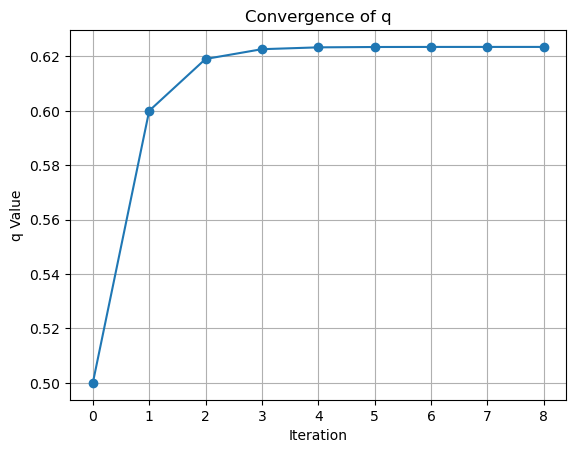

In [38]:
model.convergence(1,-1);

Given the initial parameters and consecutive alternating shocks to $y_t$, investor will believe model 1 governs earnings at probability 0.62

**Plot of the first 20 periods with randomly distributed shocks**

Iteration  1: old_y =  1, new_y =  1, q = 0.40
Iteration  2: old_y =  1, new_y =  1, q = 0.38
Iteration  3: old_y =  1, new_y =  1, q = 0.38
Iteration  4: old_y =  1, new_y = -1, q = 0.58
Iteration  5: old_y = -1, new_y = -1, q = 0.41
Iteration  6: old_y = -1, new_y = -1, q = 0.38
Iteration  7: old_y = -1, new_y =  1, q = 0.58
Iteration  8: old_y =  1, new_y = -1, q = 0.61
Iteration  9: old_y = -1, new_y = -1, q = 0.42
Iteration 10: old_y = -1, new_y = -1, q = 0.39
Iteration 11: old_y = -1, new_y =  1, q = 0.58
Iteration 12: old_y =  1, new_y =  1, q = 0.42
Iteration 13: old_y =  1, new_y =  1, q = 0.38
Iteration 14: old_y =  1, new_y =  1, q = 0.38
Iteration 15: old_y =  1, new_y =  1, q = 0.38
Iteration 16: old_y =  1, new_y = -1, q = 0.58
Iteration 17: old_y = -1, new_y = -1, q = 0.41
Iteration 18: old_y = -1, new_y =  1, q = 0.58
Iteration 19: old_y =  1, new_y = -1, q = 0.62
Iteration 20: old_y = -1, new_y =  1, q = 0.62


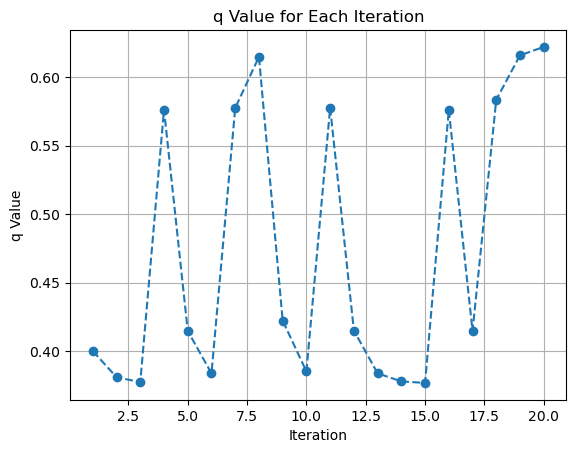

In [40]:
n = 20  # Number of periods
ini_sim = model.simulate(n)

Given initial parameters, the representative investor is relatively quick to believe in a regime change, while he will at most believe in a specific model to govern earnings with probability 62% 

# Further analysis

Now I want to investigate what happens to the convergence rate and steady state value when changing parameter values\
Recall, small $\pi_L$ means investor believes two consecutive shocks with the same sign are less likely, given model 1.\
A large $\pi_H$ means investor believes two consecutive shocks with the same sign are more likely given model 2.\
Higher $\lambda$ values indicate a stronger belief in regime changes


In [74]:
# Defining parameter value ranges including initial paramater
pi_L_values = [0.35, 0.45, model.par.pi_L]
pi_H_values = [0.55, 0.65, model.par.pi_H]

lam_1_values = [0.35, 0.45, model.par.lam_1]
lam_2_values = [0.35, 0.45, model.par.lam_2]

**"All else equal"-convergence given consecutive shocks with same sign**

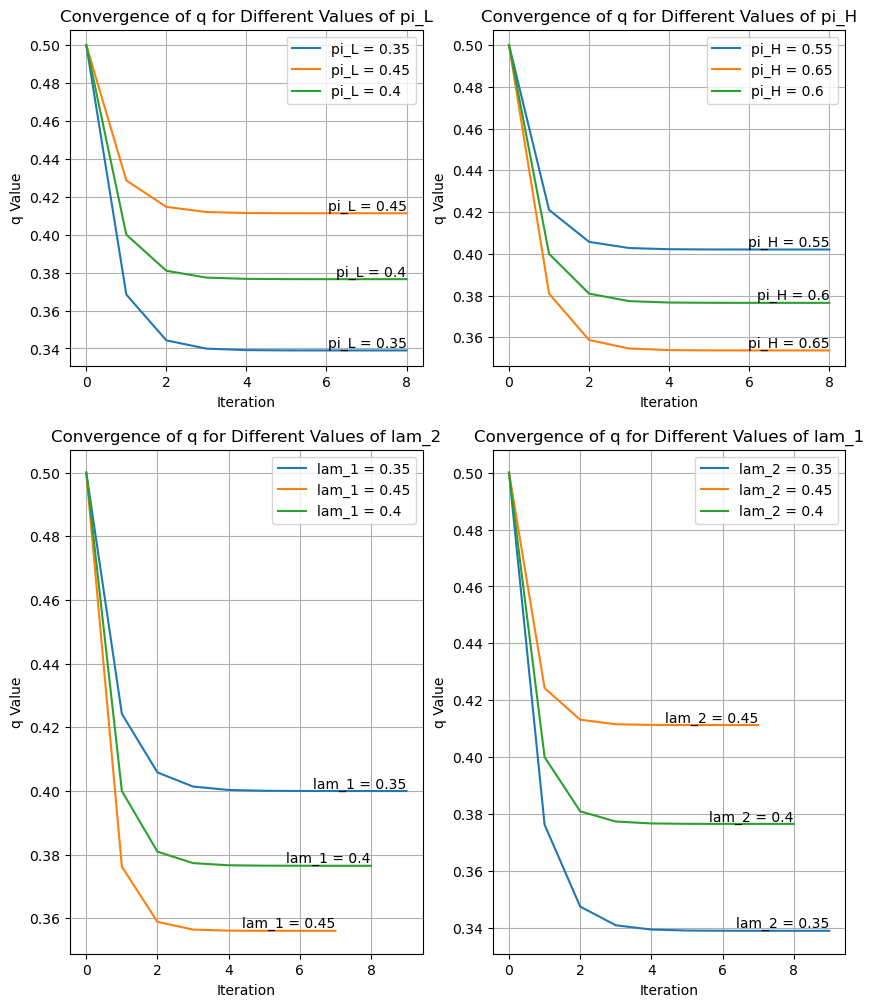

In [75]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 12), gridspec_kw={'height_ratios': [2, 3]})

convergence_results_pi_L_same = []
convergence_results_pi_H_same = []
convergence_results_lam_1_same = []
convergence_results_lam_2_same = []

# Plot for pi_L
ax1.set_xlabel('Iteration')
ax1.set_ylabel('q Value')
ax1.set_title('Convergence of q for Different Values of pi_L')
ax1.grid(True)

for pi_L in pi_L_values:
    investor = InvestorForecast()
    investor.par.pi_L = pi_L
    q_values_pi_L = investor.convergence(1, 1, False)
    convergence_results_pi_L_same.append((pi_L, q_values_pi_L))
    ax1.plot(q_values_pi_L, label=f'pi_L = {pi_L}')
    ax1.text(len(q_values_pi_L) - 1, q_values_pi_L[-1], f'pi_L = {pi_L}', verticalalignment='bottom', horizontalalignment='right')

# Plot for pi_H
ax2.set_xlabel('Iteration')
ax2.set_ylabel('q Value')
ax2.set_title('Convergence of q for Different Values of pi_H')
ax2.grid(True)

for pi_H in pi_H_values:
    investor = InvestorForecast()
    investor.par.pi_H = pi_H
    q_values_pi_H = investor.convergence(1, 1, False)
    convergence_results_pi_H_same.append((pi_H, q_values_pi_H))
    ax2.plot(q_values_pi_H, label=f'pi_H = {pi_H}')
    ax2.text(len(q_values_pi_H) - 1, q_values_pi_H[-1], f'pi_H = {pi_H}', verticalalignment='bottom', horizontalalignment='right')

# Plot for lam_1
ax3.set_xlabel('Iteration')
ax3.set_ylabel('q Value')
ax3.set_title('Convergence of q for Different Values of lam_2')
ax3.grid(True)

for lam_1 in lam_1_values:
    investor = InvestorForecast()
    investor.par.lam_1 = lam_1
    q_values_lam_1 = investor.convergence(1, 1, False)
    convergence_results_lam_1_same.append((lam_1, q_values_lam_1))
    ax3.plot(q_values_lam_1, label=f'lam_1 = {lam_1}')
    ax3.text(len(q_values_lam_1) - 1, q_values_lam_1[-1], f'lam_1 = {lam_1}', verticalalignment='bottom', horizontalalignment='right')

# Plot for lam_1
ax4.set_xlabel('Iteration')
ax4.set_ylabel('q Value')
ax4.set_title('Convergence of q for Different Values of lam_1')
ax4.grid(True)

for lam_2 in lam_2_values:
    investor = InvestorForecast()
    investor.par.lam_2 = lam_2
    q_values_lam_2 = investor.convergence(1, 1, False)
    convergence_results_lam_2_same.append((lam_2, q_values_lam_2))
    ax4.plot(q_values_lam_2, label=f'lam_2 = {lam_2}')
    ax4.text(len(q_values_lam_2) - 1, q_values_lam_2[-1], f'lam_2 = {lam_2}', verticalalignment='bottom', horizontalalignment='right')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
plt.show()

**"All else equal"-convergence given consecutive shocks with different signs**

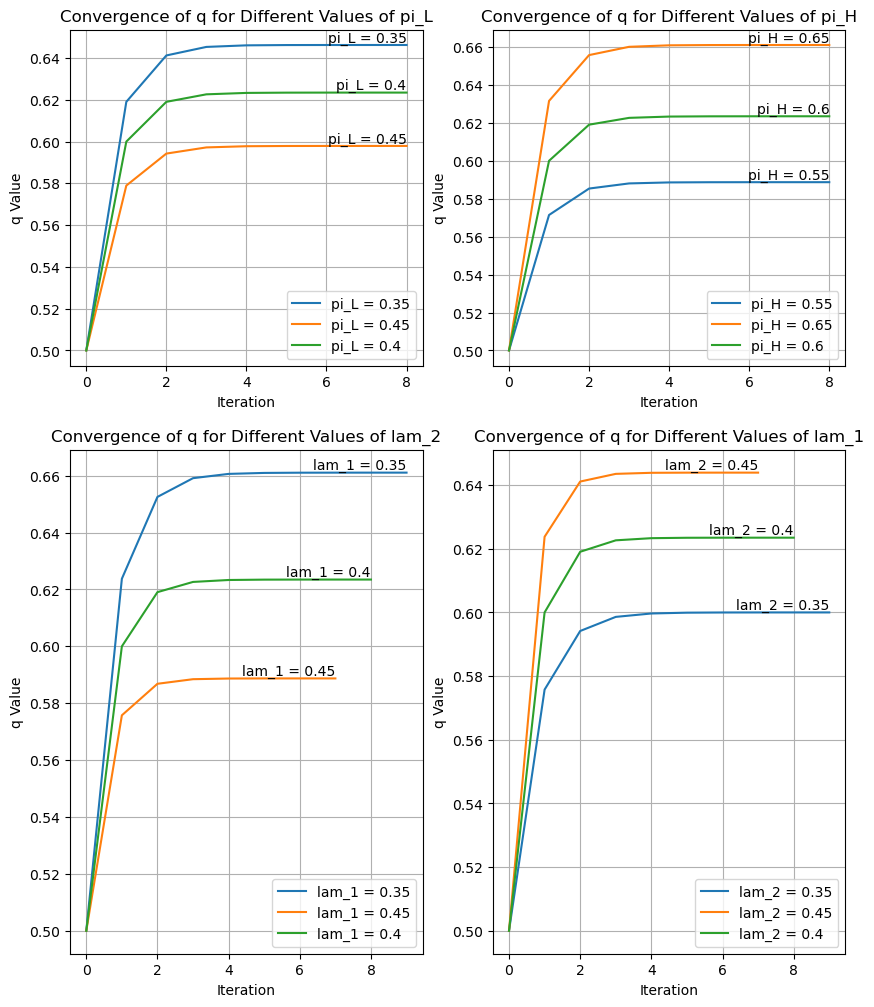

In [76]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 12), gridspec_kw={'height_ratios': [2, 3]})

convergence_results_pi_L_alternate = []
convergence_results_pi_H_alternate = []
convergence_results_lam_1_alternate = []
convergence_results_lam_2_alternate = []

# Plot for pi_L
ax1.set_xlabel('Iteration')
ax1.set_ylabel('q Value')
ax1.set_title('Convergence of q for Different Values of pi_L')
ax1.grid(True)

for pi_L in pi_L_values:
    investor = InvestorForecast()
    investor.par.pi_L = pi_L
    q_values_pi_L = investor.convergence(1, -1, False)
    convergence_results_pi_L_alternate.append((pi_L, q_values_pi_L))
    ax1.plot(q_values_pi_L, label=f'pi_L = {pi_L}')
    ax1.text(len(q_values_pi_L) - 1, q_values_pi_L[-1], f'pi_L = {pi_L}', verticalalignment='bottom', horizontalalignment='right')

# Plot for pi_H
ax2.set_xlabel('Iteration')
ax2.set_ylabel('q Value')
ax2.set_title('Convergence of q for Different Values of pi_H')
ax2.grid(True)

for pi_H in pi_H_values:
    investor = InvestorForecast()
    investor.par.pi_H = pi_H
    q_values_pi_H = investor.convergence(1, -1, False)
    convergence_results_pi_H_alternate.append((pi_H, q_values_pi_H))
    ax2.plot(q_values_pi_H, label=f'pi_H = {pi_H}')
    ax2.text(len(q_values_pi_H) - 1, q_values_pi_H[-1], f'pi_H = {pi_H}', verticalalignment='bottom', horizontalalignment='right')

# Plot for lam_1
ax3.set_xlabel('Iteration')
ax3.set_ylabel('q Value')
ax3.set_title('Convergence of q for Different Values of lam_2')
ax3.grid(True)

for lam_1 in lam_1_values:
    investor = InvestorForecast()
    investor.par.lam_1 = lam_1
    q_values_lam_1 = investor.convergence(1, -1, False)
    convergence_results_lam_1_alternate.append((lam_1, q_values_lam_1))
    ax3.plot(q_values_lam_1, label=f'lam_1 = {lam_1}')
    ax3.text(len(q_values_lam_1) - 1, q_values_lam_1[-1], f'lam_1 = {lam_1}', verticalalignment='bottom', horizontalalignment='right')

# Plot for lam_1
ax4.set_xlabel('Iteration')
ax4.set_ylabel('q Value')
ax4.set_title('Convergence of q for Different Values of lam_1')
ax4.grid(True)

for lam_2 in lam_2_values:
    investor = InvestorForecast()
    investor.par.lam_2 = lam_2
    q_values_lam_2 = investor.convergence(1, -1, False)
    convergence_results_lam_2_alternate.append((lam_2, q_values_lam_2))
    ax4.plot(q_values_lam_2, label=f'lam_2 = {lam_2}')
    ax4.text(len(q_values_lam_2) - 1, q_values_lam_2[-1], f'lam_2 = {lam_2}', verticalalignment='bottom', horizontalalignment='right')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
plt.show()

# Conclusion

Add concise conclusion. 